<a href="https://colab.research.google.com/github/sethisundercover/Heart-Disease-Prediction/blob/main/heart_disease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("heart.csv")

# Display the first five rows
df.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [2]:
# Check for missing values
df.isnull().sum()


,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


In [3]:
# Summary statistics
df.describe()


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


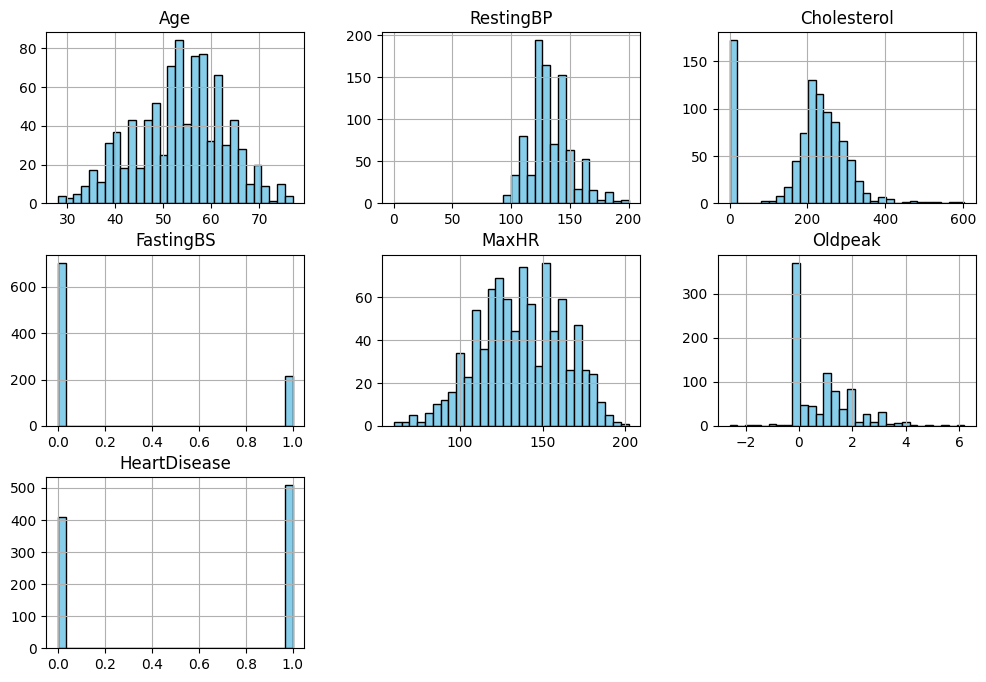

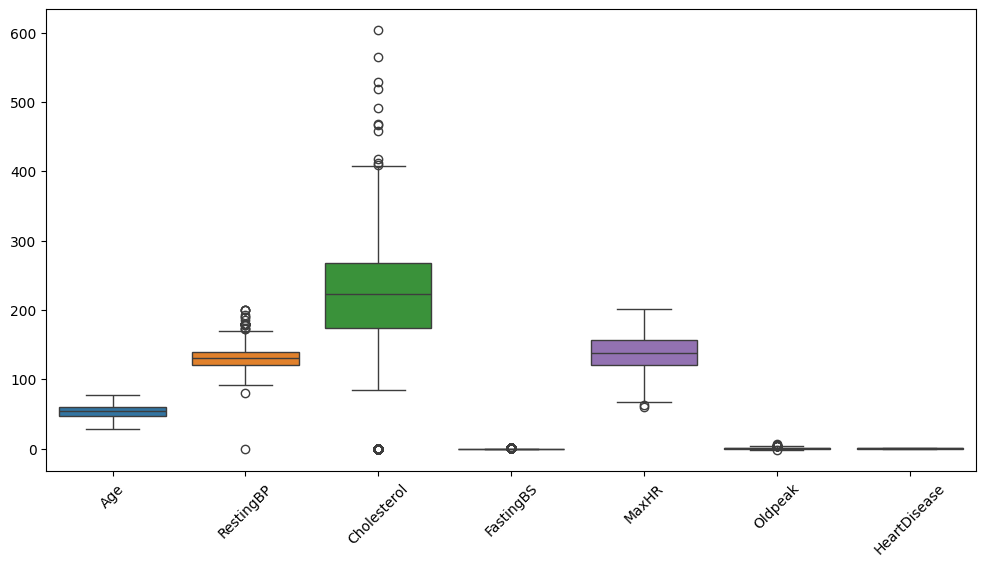

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for numerical columns
df.hist(figsize=(12, 8), bins=30, color="skyblue", edgecolor="black")
plt.show()

# Plot box plots for numerical columns
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.show()


In [6]:
# Function to remove outliers using IQR
def remove_outliers(df, columns):
    Q1 = df[columns].quantile(0.25)
    Q3 = df[columns].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[~((df[columns] < lower_bound) | (df[columns] > upper_bound)).any(axis=1)]

# Removing outliers
num_cols = ["Cholesterol", "RestingBP", "MaxHR", "Oldpeak"]
df_cleaned = remove_outliers(df, num_cols)

# Check new shape after removing outliers
df_cleaned.shape


(702, 12)

In [7]:
df_cleaned.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000
mean,52.722222,131.556980,239.709402,0.162393,140.549858,0.830912,0.462963
std,9.535341,15.420368,50.684118,0.369074,24.360985,0.959731,0.498982
min,28.000000,92.000000,85.000000,0.000000,71.000000,-0.100000,0.000000
25%,46.000000,120.000000,206.000000,0.000000,122.000000,0.000000,0.000000
50%,54.000000,130.000000,235.000000,0.000000,140.000000,0.400000,0.000000
75%,59.000000,140.000000,272.000000,0.000000,160.000000,1.500000,1.000000
max,77.000000,170.000000,404.000000,1.000000,202.000000,3.600000,1.000000


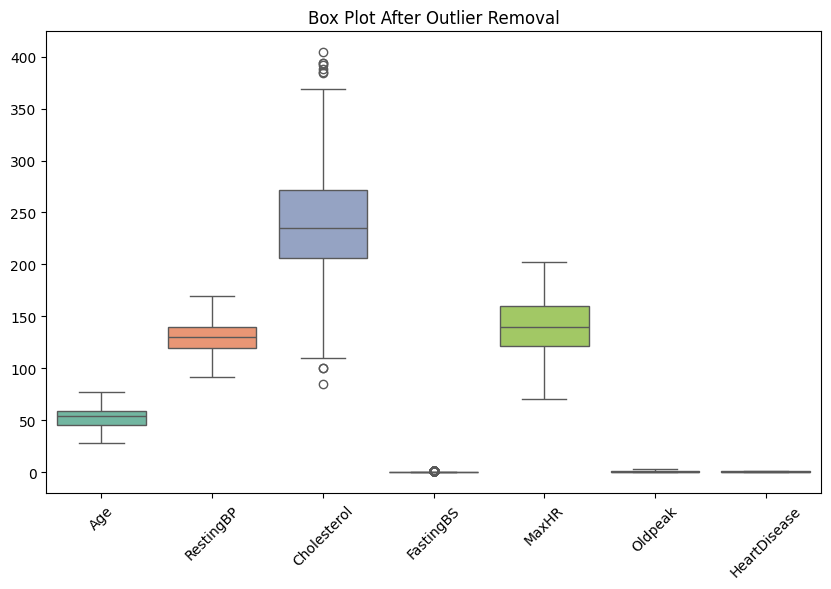

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_cleaned, palette="Set2")
plt.xticks(rotation=45)
plt.title("Box Plot After Outlier Removal")
plt.show()


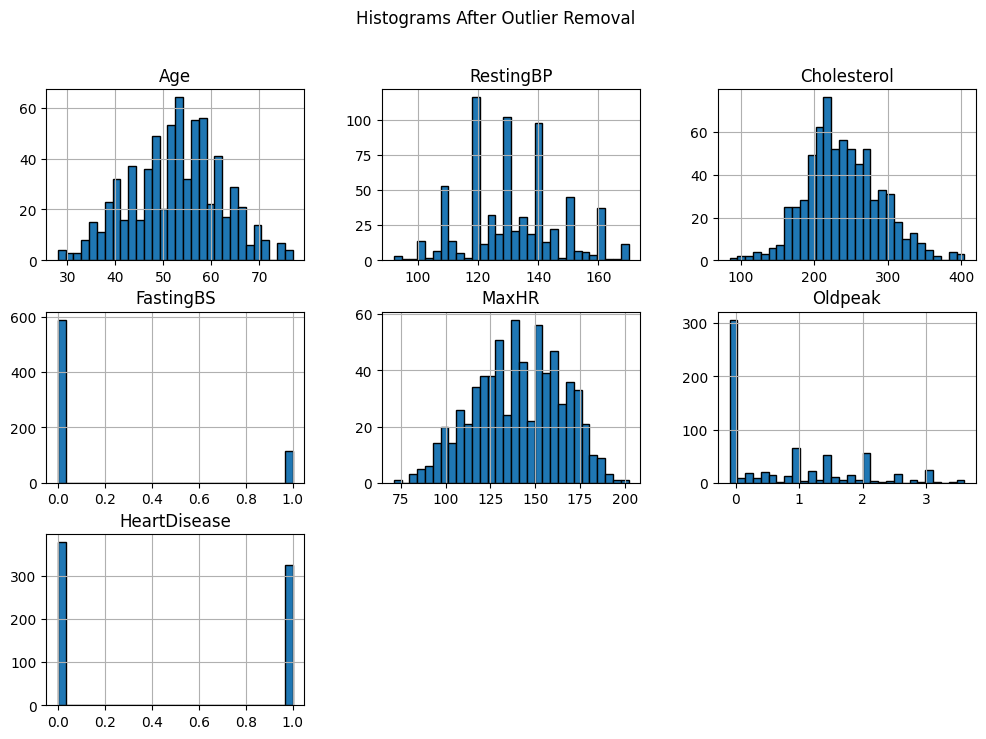

In [9]:
df_cleaned.hist(figsize=(12, 8), bins=30, edgecolor='black')
plt.suptitle("Histograms After Outlier Removal")
plt.show()


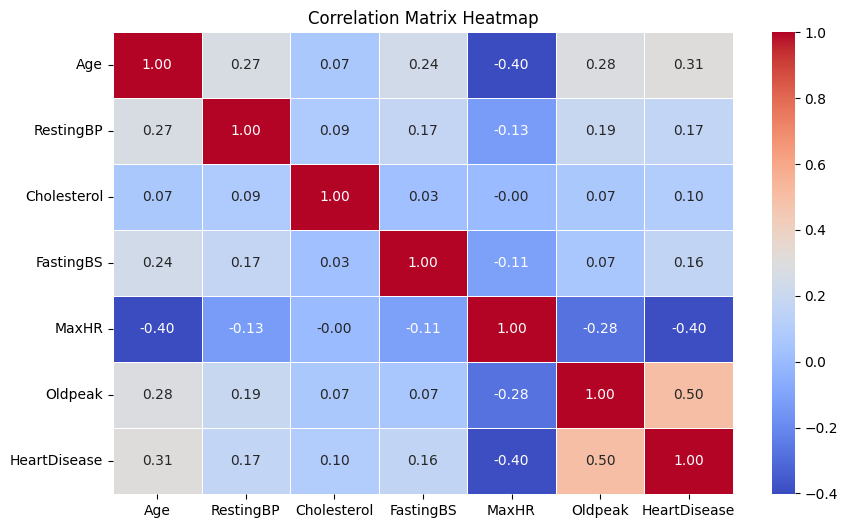

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns
df_numeric = df_cleaned.select_dtypes(include=['number'])

# Compute the correlation matrix
corr_matrix = df_numeric.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Title of the heatmap
plt.title("Correlation Matrix Heatmap")
plt.show()


In [15]:
from sklearn.preprocessing import StandardScaler

# Select numerical features
numerical_features = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform numerical features
df_cleaned[numerical_features] = scaler.fit_transform(df_cleaned[numerical_features])

# Display the transformed dataset
df_cleaned.head()


<ipython-input-15-d1a6ca99a326>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[numerical_features] = scaler.fit_transform(df_cleaned[numerical_features])


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-1.335169,M,ATA,0.547914,0.973199,-0.440315,Normal,1.291925,N,-0.866393,Up,0
1,-0.390639,F,NAP,1.845825,-1.178909,-0.440315,Normal,0.634669,N,0.176309,Flat,1
2,-1.650013,M,ATA,-0.101041,0.854735,-0.440315,ST,-1.747885,N,-0.866393,Up,0
3,-0.495587,F,ASY,0.418123,-0.507609,-0.440315,Normal,-1.337100,Y,0.697660,Flat,1
4,0.134100,M,NAP,1.196870,-0.882748,-0.440315,Normal,-0.762001,N,-0.866393,Up,0


In [16]:
from sklearn.preprocessing import OneHotEncoder

# Select categorical columns
categorical_features = ['ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

# Apply One-Hot Encoding
df_encoded = pd.get_dummies(df_cleaned, columns=categorical_features, drop_first=True)

# Display transformed dataset
df_encoded.head()


,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,-1.335169,M,0.547914,0.973199,-0.440315,1.291925,-0.866393,0,True,False,False,True,False,False,False,True
1,-0.390639,F,1.845825,-1.178909,-0.440315,0.634669,0.176309,1,False,True,False,True,False,False,True,False
2,-1.650013,M,-0.101041,0.854735,-0.440315,-1.747885,-0.866393,0,True,False,False,False,True,False,False,True
3,-0.495587,F,0.418123,-0.507609,-0.440315,-1.337100,0.697660,1,False,False,False,True,False,True,True,False
4,0.134100,M,1.196870,-0.882748,-0.440315,-0.762001,-0.866393,0,False,True,False,True,False,False,False,True


In [18]:
# Convert 'Sex' column to numeric (0 for Female, 1 for Male)
df_encoded['Sex'] = df_encoded['Sex'].map({'M': 1, 'F': 0})

# Now, recompute correlation matrix
corr_matrix = df_encoded.corr().abs()

# Identify highly correlated features
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find columns with correlation greater than 0.85
high_corr_features = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.85)]

print("Highly correlated features to remove:", high_corr_features)

# Drop highly correlated features
df_selected = df_encoded.drop(columns=high_corr_features)

# Display new dataset shape
df_selected.shape


Highly correlated features to remove: ['ST_Slope_Up']


(702, 15)

In [20]:
from sklearn.feature_selection import mutual_info_classif

# Compute Mutual Information scores
mi_scores = mutual_info_classif(X, y)

# Convert scores to DataFrame for better visualization
mi_scores_df = pd.DataFrame({'Feature': X.columns, 'MI Score': mi_scores})
mi_scores_df = mi_scores_df.sort_values(by='MI Score', ascending=False)

# Display top features
print("Top Features based on Mutual Information:\n", mi_scores_df)



Top Features based on Mutual Information:
               Feature  MI Score
13      ST_Slope_Flat  0.194254
12   ExerciseAngina_Y  0.136472
6             Oldpeak  0.121455
7   ChestPainType_ATA  0.089242
5               MaxHR  0.071943
0                 Age  0.064457
1                 Sex  0.058400
2           RestingBP  0.045109
3         Cholesterol  0.023999
8   ChestPainType_NAP  0.020627
11      RestingECG_ST  0.009598
4           FastingBS  0.009569
9    ChestPainType_TA  0.000000
10  RestingECG_Normal  0.000000


In [21]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = df_selected.drop(columns=['HeartDisease'])  # Drop target column
y = df_selected['HeartDisease']  # Target column

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display the shape of the splits
print(f"Training Set: {X_train.shape}, Testing Set: {X_test.shape}")


Training Set: (561, 14), Testing Set: (141, 14)


In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(),
    "Naïve Bayes": GaussianNB()
}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Make predictions
    accuracy = accuracy_score(y_test, y_pred)  # Evaluate accuracy
    print(f"{name}: Accuracy = {accuracy:.4f}")


Logistic Regression: Accuracy = 0.8298
Random Forest: Accuracy = 0.8298
Support Vector Machine: Accuracy = 0.8440
Naïve Bayes: Accuracy = 0.8298


In [23]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define hyperparameter grid
param_dist = {
    'n_estimators': [50, 100, 200, 300, 500],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Random Forest model
rf = RandomForestClassifier(random_state=42)

# Randomized Search
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)

# Fit on training data
random_search.fit(X_train, y_train)

# Get best parameters
best_params = random_search.best_params_
print("Best Parameters:", best_params)

# Train the best model
best_rf = RandomForestClassifier(**best_params, random_state=42)
best_rf.fit(X_train, y_train)

# Make predictions
y_pred = best_rf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


Best Parameters: {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 10}
Accuracy: 0.8298
Precision: 0.7808
Recall: 0.8769
F1-Score: 0.8261


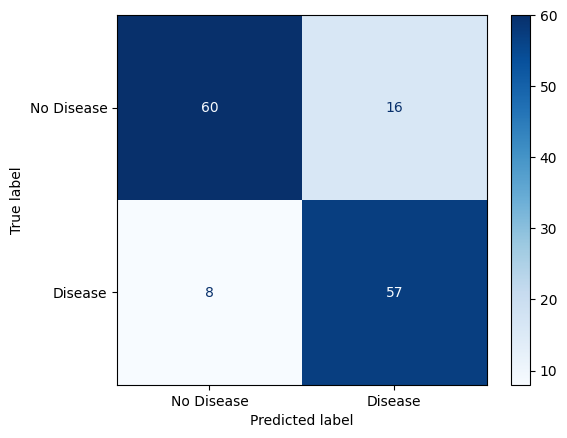

In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Disease', 'Disease'])
disp.plot(cmap='Blues')
plt.show()


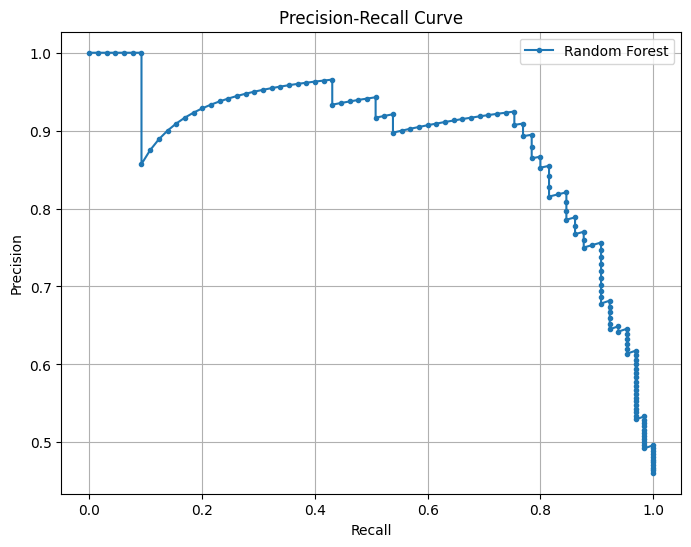

In [26]:
# Get predicted probabilities for the positive class
y_prob = model.predict_proba(X_test)[:, 1]  # model should be the trained Random Forest model

# Compute precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label='Random Forest')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid()
plt.show()


In [27]:
{'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 10}


{'n_estimators': 50,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_depth': 10}

Accuracy: 0.8298
Precision: 0.7887
Recall: 0.8615
F1-Score: 0.8235


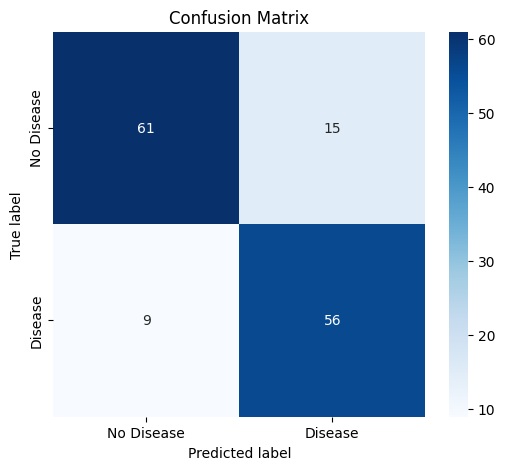

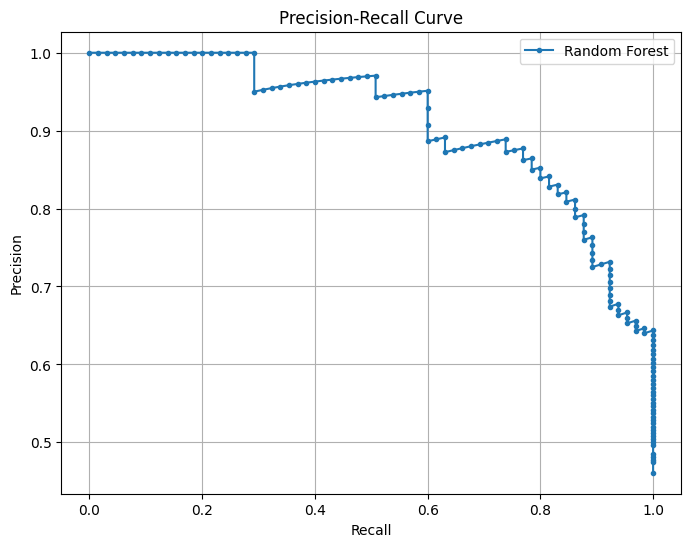

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Drop features with MI score = 0
features_to_drop = ["ChestPainType_TA", "FastingBS", "ChestPainType_NAP", "RestingECG_Normal"]
X_selected = X.drop(columns=features_to_drop)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42, stratify=y)

# Train the Random Forest with best parameters
rf = RandomForestClassifier(n_estimators=50, min_samples_split=2, min_samples_leaf=2, max_depth=10, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)[:, 1]  # Probabilities for Precision-Recall curve

# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Confusion Matrix
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix")
plt.show()

# Precision-Recall Curve
precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_prob)
plt.figure(figsize=(8,6))
plt.plot(recall_vals, precision_vals, marker='.', label="Random Forest")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.grid()
plt.show()


Threshold: 0.5
Accuracy: 0.8298
Precision: 0.7887
Recall: 0.8615
F1-Score: 0.8235


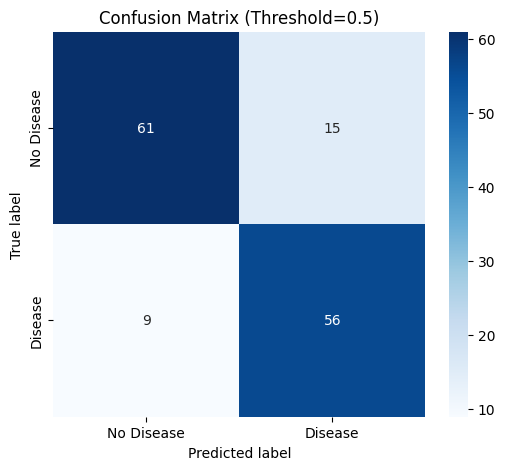

In [37]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Define a custom threshold
threshold = 0.5  # Adjust this based on precision-recall tradeoff

# Get probability scores
y_prob = rf.predict_proba(X_test)[:, 1]

# Apply threshold to get new predictions
y_pred_adjusted = (y_prob >= threshold).astype(int)

# Recalculate metrics
accuracy = accuracy_score(y_test, y_pred_adjusted)
precision = precision_score(y_test, y_pred_adjusted)
recall = recall_score(y_test, y_pred_adjusted)
f1 = f1_score(y_test, y_pred_adjusted)

# Print new evaluation metrics
print(f"Threshold: {threshold}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Confusion Matrix
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred_adjusted), annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title(f"Confusion Matrix (Threshold={threshold})")
plt.show()


In [38]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest on full dataset
rf = RandomForestClassifier(n_estimators=50, min_samples_split=2, min_samples_leaf=2, max_depth=10, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': rf.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Print Top Features
print("Feature Importance Scores:\n", feature_importance)


Feature Importance Scores:
              Feature  Importance
9      ST_Slope_Flat    0.254171
5            Oldpeak    0.155561
8   ExerciseAngina_Y    0.131888
4              MaxHR    0.125941
0                Age    0.079182
3        Cholesterol    0.076169
1                Sex    0.059648
2          RestingBP    0.058201
6  ChestPainType_ATA    0.053275
7      RestingECG_ST    0.005964


In [39]:
# Drop least important features
features_to_drop = ["RestingECG_ST", "ChestPainType_ATA"]
X_train_selected = X_train.drop(columns=features_to_drop)
X_test_selected = X_test.drop(columns=features_to_drop)

# Retrain the Random Forest model
rf_selected = RandomForestClassifier(n_estimators=50, min_samples_split=2, min_samples_leaf=2, max_depth=10, random_state=42)
rf_selected.fit(X_train_selected, y_train)

# Evaluate new model
y_pred_selected = rf_selected.predict(X_test_selected)
accuracy_selected = accuracy_score(y_test, y_pred_selected)
f1_selected = f1_score(y_test, y_pred_selected)

print(f"Accuracy after Feature Selection: {accuracy_selected:.4f}")
print(f"F1-Score after Feature Selection: {f1_selected:.4f}")


Accuracy after Feature Selection: 0.8440
F1-Score after Feature Selection: 0.8382


In [40]:
import pickle

# Save the trained model to a file
with open("best_random_forest.pkl", "wb") as model_file:
    pickle.dump(rf, model_file)

print("Model saved successfully!")


Model saved successfully!


In [41]:
# Load the model for prediction
with open("best_random_forest.pkl", "rb") as model_file:
    loaded_model = pickle.load(model_file)

# Verify by making a prediction
sample_input = X_test.iloc[0:1]  # Taking a sample input
prediction = loaded_model.predict(sample_input)

print(f"Predicted class: {prediction[0]}")


Predicted class: 1
